In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

**read data**

In [66]:
df=pd.read_csv('Q2_reg_dataset.csv')
display(df)

,x,y no noise,y with small noise,y with big noise
0,0.00,2.000000,2.061751,2.082114
1,0.05,2.127406,2.158201,2.187852
2,0.10,2.210463,2.229189,2.230387
3,0.15,2.252975,2.262249,2.446037
4,0.20,2.261589,2.330842,2.334656
5,0.25,2.244870,2.314081,2.322343
6,0.30,2.212220,2.262304,2.229781
7,0.35,2.172815,2.268021,2.291983
8,0.40,2.134692,2.176695,2.290808
9,0.45,2.104110,2.172927,2.198597


plotting datas

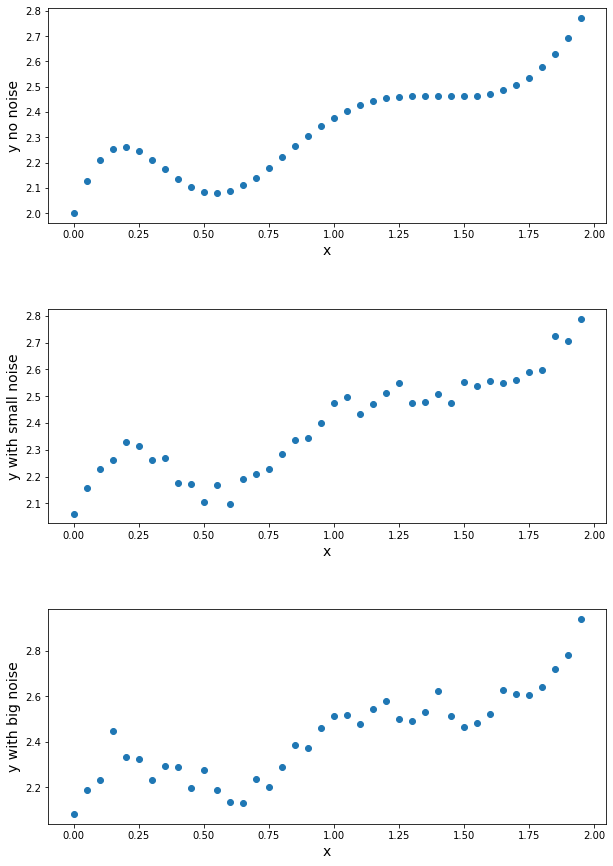

In [67]:
fig,ax = plt.subplots(3, figsize=(10, 15))
ax[0].scatter(x = df['x'], y = df['y no noise'])
ax[0].set_xlabel("x",fontsize='14')
ax[0].set_ylabel("y no noise",fontsize='14')

ax[1].scatter(x = df['x'], y = df['y with small noise'])
ax[1].set_xlabel("x",fontsize='14')
ax[1].set_ylabel("y with small noise",fontsize='14')

ax[2].scatter(x = df['x'], y = df['y with big noise'])
ax[2].set_xlabel("x",fontsize='14')
ax[2].set_ylabel("y with big noise",fontsize='14')
plt.savefig('1.jpg')
plt.subplots_adjust(hspace=0.4)
plt.show()

data split

In [68]:
sp_ran=np.random.rand(len(df['x']))<0.5
# check how many of our data splited to True for train set
print(np.sum(sp_ran))     

train=df[sp_ran]
test=df[~sp_ran]
train
x_train=np.array(train[['x']])
x_test=np.array(test[['x']])
y_nn_train=np.array(train[['y no noise']])
y_sn_train=np.array(train[['y with small noise']])
y_bn_train=np.array(train[['y with big noise']])
y_nn_test=np.array(test[['y no noise']])
y_sn_test=np.array(test[['y with small noise']])
y_bn_test=np.array(test[['y with big noise']])
print(len(y_nn_test))

16
24


**model and plot and evaluate a : f1(x)**

no noise

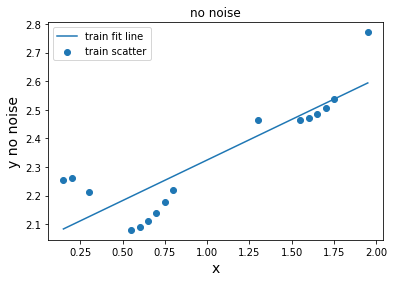

Mean absolute error of train: 0.081
Residual sum of squares of train (MSE): 0.010








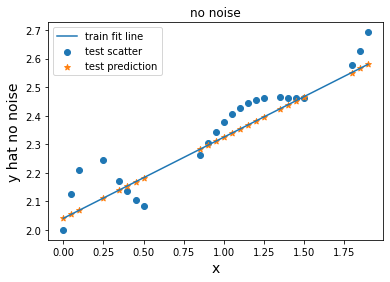

Mean absolute error of test: 0.056
Residual sum of squares of test (MSE): 0.005



Coefficients:  [[0.28349805]]
Intercept:  [2.04086019]


In [69]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
x=np.arange(0,2,0.01)
###### y no noise
regr_nn=regr.fit(x_train,y_nn_train)  ## nn=no noise
y_fit_f1n=regr_nn.intercept_[0] + regr_nn.coef_[0][0]*x_train
plt.scatter(x_train,y_nn_train,label='train scatter')
plt.xlabel("x",fontsize='14')
plt.ylabel('y no noise',fontsize='14')
plt.plot(x_train,y_fit_f1n,label='train fit line')
plt.title('no noise')
plt.legend()
plt.savefig('2.jpg')
plt.show()
##### evaluate train
print("Mean absolute error of train: %.3f" % np.mean(np.absolute(y_fit_f1n-y_nn_train)))
print("Residual sum of squares of train (MSE): %.3f" % np.mean((y_fit_f1n-y_nn_train) ** 2))
print(2*'\n')
print(2*'\n')
#### test prediction
y_hat_nn=regr_nn.predict(x_test)
y_per_f1n=regr_nn.intercept_[0] + regr_nn.coef_[0][0]*x_test
fig=plt.scatter(x_test,y_nn_test,label='test scatter')
plt.xlabel("x",fontsize='14')
plt.ylabel('y hat no noise',fontsize='14')
fig2=plt.plot(x_test,y_per_f1n,label='train fit line')
plt.scatter(x_test,y_hat_nn,marker='*',label='test prediction')
plt.title('no noise')
plt.legend()
plt.savefig('3.jpg')
plt.show()


## evaluate test
print("Mean absolute error of test: %.3f" % np.mean(np.absolute(y_hat_nn - y_nn_test)))
print("Residual sum of squares of test (MSE): %.3f" % np.mean((y_hat_nn - y_nn_test) ** 2))
print(2*'\n')

'''
print(regr_nn.coef_[0][0])
print(regr_nn.intercept_[0])
print(y_fit_f1n)
print(x_train)
print(y_hat_nn-y_nn_test)
'''

print ('Coefficients: ', regr_nn.coef_)
print ('Intercept: ',regr.intercept_)

small noise

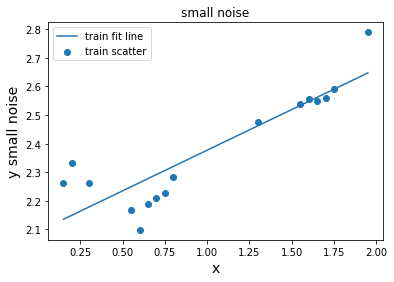

Mean absolute error of train: 0.070
Residual sum of squares of train (MSE): 0.008





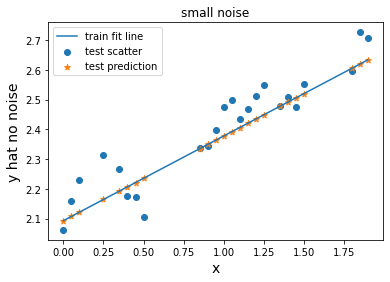

Mean absolute error of test: 0.058
Residual sum of squares of test (MSE): 0.005



Coefficients:  [[0.28427104]]
Intercept:  [2.09295807]


In [70]:
###### y no noise
regr_sn=regr.fit(x_train,y_sn_train)  ## nn=no noise
y_fit_f1s=regr_sn.intercept_[0] + regr_sn.coef_[0][0]*x_train
plt.scatter(x_train,y_sn_train,label='train scatter')
plt.xlabel("x",fontsize='14')
plt.ylabel('y small noise',fontsize='14')
plt.plot(x_train,y_fit_f1s,label='train fit line')
plt.title('small noise')
plt.legend()
plt.savefig('4.jpg')
plt.show()
# evaluate train
print("Mean absolute error of train: %.3f" % np.mean(np.absolute(y_fit_f1s - y_sn_train)))
print("Residual sum of squares of train (MSE): %.3f" % np.mean((y_fit_f1s-y_sn_train) ** 2))
print(2*'\n')
#### test prediction
y_hat_sn=regr_sn.predict(x_test)
y_per_f1s=regr_sn.intercept_[0] + regr_sn.coef_[0][0]*x_test
plt.scatter(x_test,y_sn_test,label='test scatter')
plt.xlabel("x",fontsize='14')
plt.ylabel('y hat no noise',fontsize='14')
plt.plot(x_test,y_per_f1s,label='train fit line')
plt.scatter(x_test,y_hat_sn,label='test prediction',marker='*')
plt.title('small noise')
plt.legend()
plt.savefig('5.jpg')
plt.show()

## evaluate test

print("Mean absolute error of test: %.3f" % np.mean(np.absolute(y_hat_sn - y_sn_test)))
print("Residual sum of squares of test (MSE): %.3f" % np.mean((y_hat_sn - y_sn_test) ** 2))
print(2*'\n')

print ('Coefficients: ', regr_sn.coef_)
print ('Intercept: ',regr_sn.intercept_)

big noise

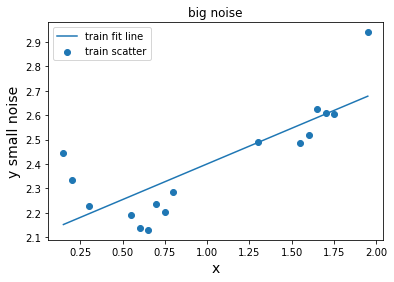

Mean absolute error for train: 0.100
Residual sum of squares (MSE) for train: 0.017





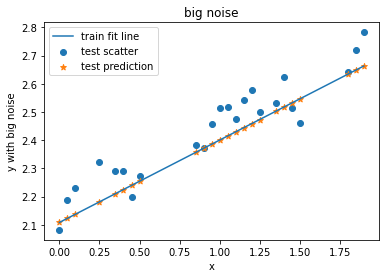

Mean absolute error: 0.066
Residual sum of squares (MSE): 0.006



Coefficients:  [[0.29177453]]
Intercept:  [2.10862869]


In [71]:
###### y no noise
regr_bn=regr.fit(x_train,y_bn_train)  ## nn=no noise
y_fit_f1b=regr_bn.intercept_[0] + regr_bn.coef_[0][0]*x_train
plt.scatter(x_train,y_bn_train,label='train scatter')
plt.xlabel("x",fontsize='14')
plt.ylabel('y small noise',fontsize='14')
plt.plot(x_train,y_fit_f1b,label='train fit line')
plt.title('big noise')
plt.legend()
plt.savefig('6.jpg')
plt.show()

# evaluate train
print("Mean absolute error for train: %.3f" % np.mean(np.absolute(y_fit_f1b - y_bn_train)))
print("Residual sum of squares (MSE) for train: %.3f" % np.mean((y_fit_f1b-y_bn_train) ** 2))
print(2*'\n')
#### test prediction
y_hat_bn=regr_bn.predict(x_test)
y_per_f1b=regr_bn.intercept_[0] + regr_bn.coef_[0][0]*x_test
plt.scatter(x_test,y_bn_test,label='test scatter')
plt.plot(x_test,y_per_f1b,label='train fit line')
plt.scatter(x_test,y_hat_bn,marker='*',label='test prediction')
plt.ylabel('y with big noise')
plt.xlabel('x')
plt.title('big noise')
plt.legend()
plt.savefig('7.jpg')
plt.show()
## evaluate test

print("Mean absolute error: %.3f" % np.mean(np.absolute(y_hat_bn - y_bn_test)))
print("Residual sum of squares (MSE): %.3f" % np.mean((y_hat_bn - y_bn_test) ** 2))
print(2*'\n')

print ('Coefficients: ', regr_bn.coef_)
print ('Intercept: ',regr_bn.intercept_)

**model and plot and evaluate b : f2(x)**

no noise

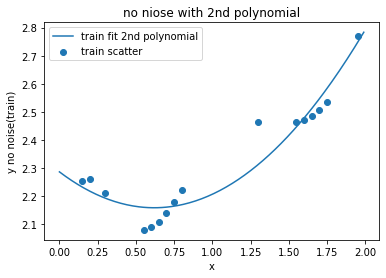

Mean absolute error: 0.0427
Residual sum of squares (MSE): 0.0030
Coefficients of polynoial:  [ 0.         -0.41230646  0.33267956]
Intercept of polynomial:  2.286680319697932





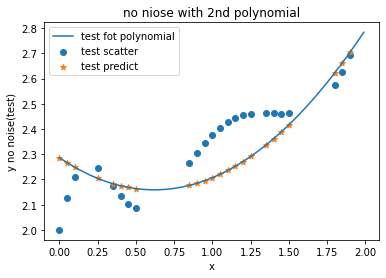

Mean absolute error: 0.1078
Residual sum of squares (MSE): 0.0166


In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly_2=PolynomialFeatures(degree=2)
x_poly2_train=poly_2.fit_transform(x_train)
x_poly2_test=poly_2.fit_transform(x_test)
regr_f2_nn=regr.fit(x_poly2_train,y_nn_train)
#### train plot & evaluation
y_fit_f2_nn=regr_f2_nn.intercept_[0] + regr_f2_nn.coef_[0][1]*x_train + regr_f2_nn.coef_[0][2]*(x_train**2) 
y_fit_f2_nn_line=regr_f2_nn.intercept_[0] + regr_f2_nn.coef_[0][1]*x + regr_f2_nn.coef_[0][2]*(x**2) 
plt.scatter(x_train,y_nn_train,label='train scatter')
plt.plot(x,y_fit_f2_nn_line,label='train fit 2nd polynomial')
plt.legend()
plt.title('no niose with 2nd polynomial')
plt.ylabel('y no noise(train)')
plt.xlabel('x')
plt.savefig('8.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f2_nn-y_nn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f2_nn - y_nn_train) ** 2))
print('Coefficients of polynoial: ', regr_f2_nn.coef_[0])
print('Intercept of polynomial: ',regr_f2_nn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y2_hat_nn = regr.predict(x_poly2_test)
plt.plot(x,y_fit_f2_nn_line,label='test fot polynomial')
plt.scatter(x_test,y_nn_test,label='test scatter')
plt.scatter(x_test,y2_hat_nn,label='test predict',marker='*')
plt.title('no niose with 2nd polynomial')
plt.ylabel('y no noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('9.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y2_hat_nn - y_nn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y2_hat_nn - y_nn_test) ** 2))



small noise

Coefficients of polynoial:  [ 0.         -0.35016792  0.30333933]
Intercept of polynomial:  2.317098418677698





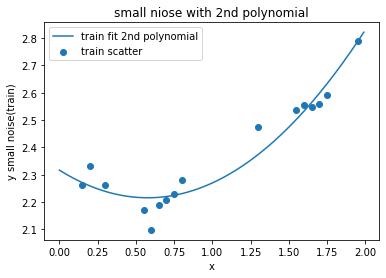

Mean absolute error: 0.0386
Residual sum of squares (MSE): 0.0026





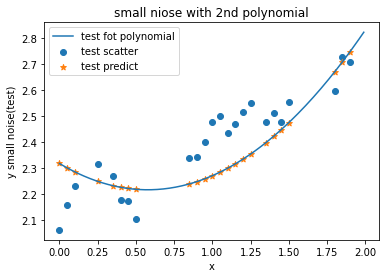

Mean absolute error: 0.1078
Residual sum of squares (MSE): 0.0158


In [73]:
regr_f2_sn=regr.fit(x_poly2_train,y_sn_train)
#### train plot & evaluation
y_fit_f2_sn=regr_f2_sn.intercept_[0] + regr_f2_sn.coef_[0][1]*x_train + regr_f2_sn.coef_[0][2]*(x_train**2) 
y_fit_f2_sn_line=regr_f2_sn.intercept_[0] + regr_f2_sn.coef_[0][1]*x + regr_f2_sn.coef_[0][2]*(x**2) 
print('Coefficients of polynoial: ', regr_f2_sn.coef_[0])
print('Intercept of polynomial: ',regr_f2_sn.intercept_[0])
print(2*'\n')

plt.scatter(x_train,y_sn_train,label='train scatter')
plt.plot(x,y_fit_f2_sn_line,label='train fit 2nd polynomial')
plt.legend()
plt.title('small niose with 2nd polynomial')
plt.ylabel('y small noise(train)')
plt.xlabel('x')
plt.savefig('10.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f2_sn-y_sn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f2_sn - y_sn_train) ** 2))


print(2*'\n')
#### test plot & evaluation
y2_hat_sn = regr.predict(x_poly2_test)
plt.plot(x,y_fit_f2_sn_line,label='test fot polynomial')
plt.scatter(x_test,y_sn_test,label='test scatter')
plt.scatter(x_test,y2_hat_sn,label='test predict',marker='*')
plt.title('small niose with 2nd polynomial')
plt.ylabel('y small noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('11.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y2_hat_sn-y_sn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y2_hat_sn - y_sn_test) ** 2))



big noise

Coefficients of polynoial:  [ 0.         -0.67622529  0.46282217]
Intercept of polynomial:  2.450612453373828





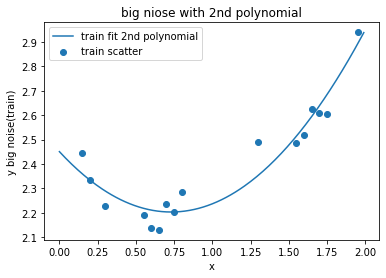

Mean absolute error: 0.0518
Residual sum of squares (MSE): 0.0039





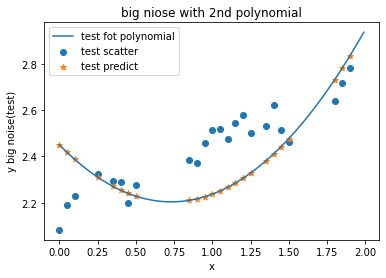

Mean absolute error: 0.1495
Residual sum of squares (MSE): 0.0324


In [74]:
regr_f2_bn=regr.fit(x_poly2_train,y_bn_train)
#### train plot & evaluation
y_fit_f2_bn=regr_f2_bn.intercept_[0] + regr_f2_bn.coef_[0][1]*x_train + regr_f2_bn.coef_[0][2]*(x_train**2) 
y_fit_f2_bn_line=regr_f2_bn.intercept_[0] + regr_f2_bn.coef_[0][1]*x + regr_f2_bn.coef_[0][2]*(x**2) 
print('Coefficients of polynoial: ', regr_f2_bn.coef_[0])
print('Intercept of polynomial: ',regr_f2_bn.intercept_[0])
print(2*'\n')

plt.scatter(x_train,y_bn_train,label='train scatter')
plt.plot(x,y_fit_f2_bn_line,label='train fit 2nd polynomial')
plt.legend()
plt.title('big niose with 2nd polynomial')
plt.ylabel('y big noise(train)')
plt.xlabel('x')
plt.savefig('12.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f2_bn-y_bn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f2_bn - y_bn_train) ** 2))


print(2*'\n')
#### test plot & evaluation
y2_hat_bn = regr.predict(x_poly2_test)
plt.plot(x,y_fit_f2_bn_line,label='test fot polynomial')
plt.scatter(x_test,y_bn_test,label='test scatter')
plt.scatter(x_test,y2_hat_bn,label='test predict',marker='*')
plt.title('big niose with 2nd polynomial')
plt.ylabel('y big noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('13.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y2_hat_bn - y_bn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y2_hat_bn - y_bn_test) ** 2))



**model and plot and evaluate c : f3(x)**

no noise

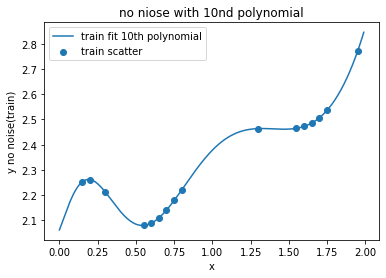

Mean absolute error: 0.0000
Residual sum of squares (MSE): 0.0000
Coefficients of polynoial:  [   0.            1.60222259    3.88842365  -65.91681785  212.64978032
 -334.34903268  306.38430363 -173.01152293   59.67898345  -11.58239362
    0.97206838]
Intercept of polynomial:  2.0621492930244134





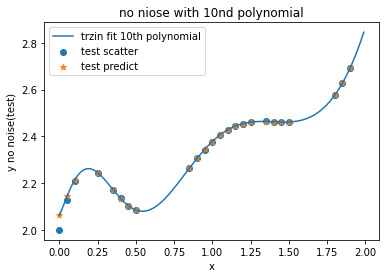

Mean absolute error: 0.0037
Residual sum of squares (MSE): 0.0002


In [75]:
from numpy.ma.core import append
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly_10=PolynomialFeatures(degree=10)
x_poly10_train=poly_10.fit_transform(x_train)
x_poly10_test=poly_10.fit_transform(x_test)
regr_f3_nn=regr.fit(x_poly10_train,y_nn_train)
#### train plot & evaluation
y_fit_f3_nn=regr_f3_nn.intercept_[0]
for i in range(len(regr_f3_nn.coef_[0])-1):
    y_fit_f3_nn+=(regr_f3_nn.coef_[0][i+1]*pow(x_train,i+1) )

y_fit_f3_nn_line=regr_f3_nn.intercept_[0]
for i in range(len(regr_f3_nn.coef_[0])-1):
    y_fit_f3_nn_line+=(regr_f3_nn.coef_[0][i+1]*pow(x,i+1) )


plt.scatter(x_train,y_nn_train,label='train scatter')
plt.plot(x,y_fit_f3_nn_line,label='train fit 10th polynomial',)
plt.legend()

plt.title('no niose with 10nd polynomial')
plt.ylabel('y no noise(train)')
plt.xlabel('x')
plt.savefig('14.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f3_nn-y_nn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f3_nn - y_nn_train) ** 2))
print('Coefficients of polynoial: ', regr_f3_nn.coef_[0])
print('Intercept of polynomial: ',regr_f3_nn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y3_hat_nn = regr.predict(x_poly10_test)


plt.plot(x,y_fit_f3_nn_line,label='trzin fit 10th polynomial')
plt.scatter(x_test,y_nn_test,label='test scatter')
plt.scatter(x_test,y3_hat_nn,label='test predict',marker='*')
plt.title('no niose with 10nd polynomial')
plt.ylabel('y no noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('15.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y3_hat_nn-y_nn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y3_hat_nn - y_nn_test) ** 2))

small noise

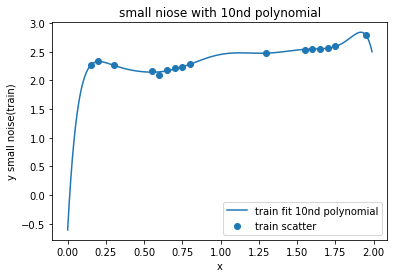

Mean absolute error: 0.0090
Residual sum of squares (MSE): 0.0003
Coefficients of polynoial:  [    0.            50.09054721  -350.34670676  1341.49965276
 -3178.12375332  4878.13267211 -4906.55263508  3197.5041441
 -1296.81439305   296.97033308   -29.30036402]
Intercept of polynomial:  -0.6064036471959784





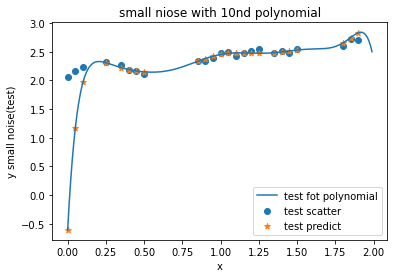

Mean absolute error: 0.1916
Residual sum of squares (MSE): 0.3417


In [76]:
regr_f3_sn=regr.fit(x_poly10_train,y_sn_train)
#### train plot & evaluation
y_fit_f3_sn=regr_f3_sn.intercept_[0]
for i in range(len(regr_f3_sn.coef_[0])-1):
    y_fit_f3_sn+=(regr_f3_sn.coef_[0][i+1]*pow(x_train,i+1) )

y_fit_f3_sn_line=regr_f3_sn.intercept_[0]
for i in range(len(regr_f3_sn.coef_[0])-1):
    y_fit_f3_sn_line+=(regr_f3_sn.coef_[0][i+1]*pow(x,i+1) )

plt.scatter(x_train,y_sn_train,label='train scatter')
plt.plot(x,y_fit_f3_sn_line,label='train fit 10nd polynomial',)
plt.legend()

plt.title('small niose with 10nd polynomial')
plt.ylabel('y small noise(train)')
plt.xlabel('x')
plt.savefig('16.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f3_sn-y_sn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f3_sn - y_sn_train) ** 2))
print('Coefficients of polynoial: ', regr_f3_sn.coef_[0])
print('Intercept of polynomial: ',regr_f3_sn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y3_hat_sn = regr.predict(x_poly10_test)

plt.plot(x,y_fit_f3_sn_line,label='test fot polynomial')
plt.scatter(x_test,y_sn_test,label='test scatter')
plt.scatter(x_test,y3_hat_sn,label='test predict',marker='*')
plt.title('small niose with 10nd polynomial')
plt.ylabel('y small noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('17.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y3_hat_sn-y_sn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y3_hat_sn - y_sn_test) ** 2))


big noise

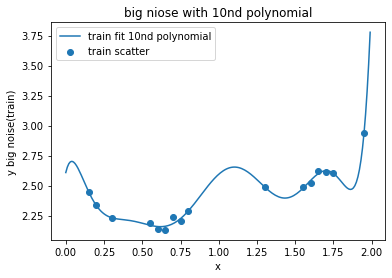

Mean absolute error: 0.0143
Residual sum of squares (MSE): 0.0004
Coefficients of polynoial:  [    0.             5.44476108   -96.67383524   530.8086822
 -1487.49523141  2403.02104224 -2334.63587321  1367.63705536
  -464.28089861    81.52095363    -5.36092959]
Intercept of polynomial:  2.6085660394473233





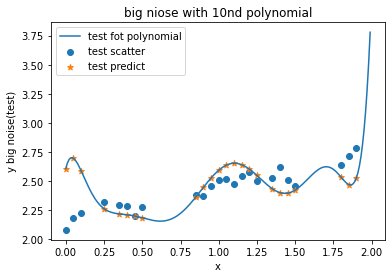

Mean absolute error: 0.1455
Residual sum of squares (MSE): 0.0406


In [77]:
regr_f3_bn=regr.fit(x_poly10_train,y_bn_train)
#### train plot & evaluation
y_fit_f3_bn=regr_f3_bn.intercept_[0]
for i in range(len(regr_f3_bn.coef_[0])-1):
    y_fit_f3_bn+=(regr_f3_bn.coef_[0][i+1]*pow(x_train,i+1) )

y_fit_f3_bn_line=regr_f3_bn.intercept_[0]
for i in range(len(regr_f3_bn.coef_[0])-1):
    y_fit_f3_bn_line+=(regr_f3_bn.coef_[0][i+1]*pow(x,i+1) )


plt.scatter(x_train,y_bn_train,label='train scatter')
plt.plot(x,y_fit_f3_bn_line,label='train fit 10nd polynomial',)
plt.legend()

plt.title('big niose with 10nd polynomial')
plt.ylabel('y big noise(train)')
plt.xlabel('x')
plt.savefig('18.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f3_bn-y_bn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f3_bn - y_bn_train) ** 2))
print('Coefficients of polynoial: ', regr_f3_bn.coef_[0])
print('Intercept of polynomial: ',regr_f3_bn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y3_hat_bn = regr.predict(x_poly10_test)

plt.plot(x,y_fit_f3_bn_line,label='test fot polynomial')
plt.scatter(x_test,y_bn_test,label='test scatter')
plt.scatter(x_test,y3_hat_bn,label='test predict',marker='*')
plt.title('big niose with 10nd polynomial')
plt.ylabel('y big noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('19.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y3_hat_bn-y_bn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y3_hat_bn - y_bn_test) ** 2))


**model and plot and evaluate d : f4(x)**

transforming to sin & cos

In [78]:
from scipy.optimize import zeros
unit_train=np.ones((len(x_train),1))
unit_test=np.ones((len(x_test),1))
x_train_sin=np.sin(x_train)
x_train_2sin=np.sin(2*(x_train))
x_train_cos=np.cos(x_train)
x_train_2cos=np.cos(2*(x_train))
x_f4_train=np.append(np.append(np.append(np.append(np.append(unit_train,x_train,axis=1),x_train_sin,axis=1),x_train_2sin,axis=1),x_train_cos,axis=1) ,\
             x_train_2cos,axis=1)

x_test_sin=np.sin(x_test)
x_test_2sin=np.sin(2*(x_test))
x_test_cos=np.cos(x_test)
x_test_2cos=np.cos(2*(x_test))
x_f4_test=np.append(np.append(np.append(np.append(np.append(unit_test,x_test,axis=1),x_test_sin,axis=1),x_test_2sin,axis=1),x_test_cos,axis=1) ,\
             x_test_2cos,axis=1)


print(len(x_f4_train))
print(len(x_f4_test))

16
24


regression & plotting & evaluation

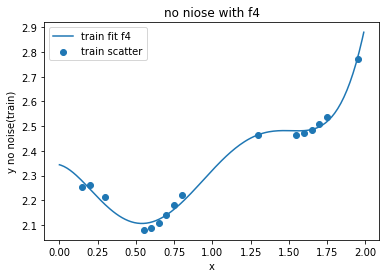

Mean absolute error: 0.0150
Residual sum of squares (MSE): 0.0003
Coefficients of polynoial:  [  0.          25.51609522 -23.40309903  -1.13600673  27.77857511
  -5.6191842 ]
Intercept of polynomial:  -19.815709387610433





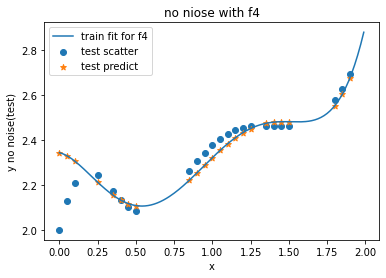

Mean absolute error: 0.0511
Residual sum of squares (MSE): 0.0079


In [79]:
regr_f4_nn=regr.fit(x_f4_train,y_nn_train)
#### train plot & evaluation
y_fit_f4_nn=regr_f4_nn.intercept_[0] + regr_f4_nn.coef_[0][1]*x_train + regr_f4_nn.coef_[0][2]*x_train_sin + regr_f4_nn.coef_[0][3]*x_train_2sin +\
regr_f4_nn.coef_[0][4]*x_train_cos + regr_f4_nn.coef_[0][5]*x_train_2cos

y_fit_f4_nn_line=regr_f4_nn.intercept_[0] + regr_f4_nn.coef_[0][1]*x + regr_f4_nn.coef_[0][2]*np.sin(x) + regr_f4_nn.coef_[0][3]*np.sin(2*x) +\
regr_f4_nn.coef_[0][4]*np.cos(x) + regr_f4_nn.coef_[0][5]*np.cos(2*x)

plt.scatter(x_train,y_nn_train,label='train scatter')
plt.plot(x,y_fit_f4_nn_line,label='train fit f4',)
plt.legend()

plt.title('no niose with f4')
plt.ylabel('y no noise(train)')
plt.xlabel('x')
plt.savefig('20.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f4_nn-y_nn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f4_nn - y_nn_train) ** 2))
print('Coefficients of polynoial: ', regr_f4_nn.coef_[0])
print('Intercept of polynomial: ',regr_f4_nn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y4_hat_nn = regr.predict(x_f4_test)
plt.plot(x,y_fit_f4_nn_line,label='train fit for f4')
plt.scatter(x_test,y_nn_test,label='test scatter')
plt.scatter(x_test,y4_hat_nn,label='test predict',marker='*')
plt.title('no niose with f4')
plt.ylabel('y no noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('21.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y4_hat_nn-y_nn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y4_hat_nn - y_nn_test) ** 2))


small noise

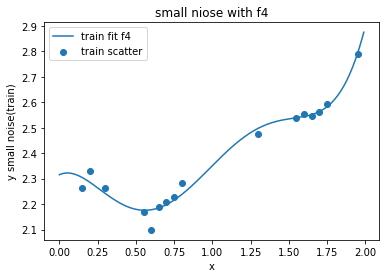

Mean absolute error: 0.0201
Residual sum of squares (MSE): 0.0009
Coefficients of polynoial:  [  0.          22.70694342 -19.68865102  -1.36967292  25.34963781
  -4.79799203]
Intercept of polynomial:  -18.23631611802145





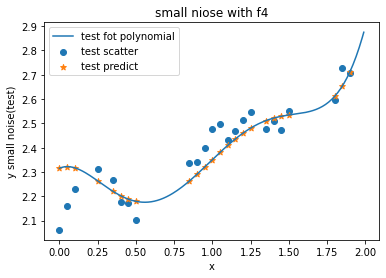

Mean absolute error: 0.0648
Residual sum of squares (MSE): 0.0072


In [80]:
regr_f4_sn=regr.fit(x_f4_train,y_sn_train)
#### train plot & evaluation
y_fit_f4_sn=regr_f4_sn.intercept_[0] + regr_f4_sn.coef_[0][1]*x_train + regr_f4_sn.coef_[0][2]*x_train_sin + regr_f4_sn.coef_[0][3]*x_train_2sin +\
regr_f4_sn.coef_[0][4]*x_train_cos + regr_f4_sn.coef_[0][5]*x_train_2cos

y_fit_f4_sn_line=regr_f4_sn.intercept_[0] + regr_f4_sn.coef_[0][1]*x + regr_f4_sn.coef_[0][2]*np.sin(x) + regr_f4_sn.coef_[0][3]*np.sin(2*x) +\
regr_f4_sn.coef_[0][4]*np.cos(x) + regr_f4_sn.coef_[0][5]*np.cos(2*x)
plt.scatter(x_train,y_sn_train,label='train scatter')
plt.plot(x,y_fit_f4_sn_line,label='train fit f4')
plt.legend()

plt.title('small niose with f4')
plt.ylabel('y small noise(train)')
plt.xlabel('x')
plt.savefig('22.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f4_sn-y_sn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f4_sn - y_sn_train) ** 2))
print('Coefficients of polynoial: ', regr_f4_sn.coef_[0])
print('Intercept of polynomial: ',regr_f4_sn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y4_hat_sn = regr.predict(x_f4_test)
plt.plot(x,y_fit_f4_sn_line,label='test fot polynomial')
plt.scatter(x_test,y_sn_test,label='test scatter')
plt.scatter(x_test,y4_hat_sn,label='test predict',marker='*')
plt.title('small niose with f4')
plt.ylabel('y small noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('23.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y4_hat_sn-y_sn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y4_hat_sn - y_sn_test) ** 2))

big noise

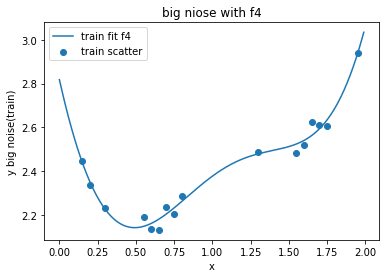

Mean absolute error: 0.0258
Residual sum of squares (MSE): 0.0009
Coefficients of polynoial:  [  0.           3.88157808 -10.42650052   1.70589446   0.15130978
  -2.096278  ]
Intercept of polynomial:  4.763024735286198





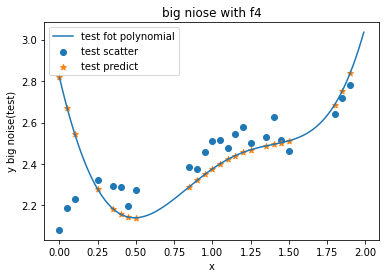

Mean absolute error: 0.1331
Residual sum of squares (MSE): 0.0433


In [81]:
regr_f4_bn=regr.fit(x_f4_train,y_bn_train)
#### train plot & evaluation
y_fit_f4_bn=regr_f4_bn.intercept_[0] + regr_f4_bn.coef_[0][1]*x_train + regr_f4_bn.coef_[0][2]*x_train_sin + regr_f4_bn.coef_[0][3]*x_train_2sin +\
regr_f4_bn.coef_[0][4]*x_train_cos + regr_f4_bn.coef_[0][5]*x_train_2cos

y_fit_f4_bn_line=regr_f4_bn.intercept_[0] + regr_f4_bn.coef_[0][1]*x + regr_f4_bn.coef_[0][2]*np.sin(x) + regr_f4_bn.coef_[0][3]*np.sin(2*x) +\
regr_f4_bn.coef_[0][4]*np.cos(x) + regr_f4_bn.coef_[0][5]*np.cos(2*x)
plt.scatter(x_train,y_bn_train,label='train scatter')
plt.plot(x,y_fit_f4_bn_line,label='train fit f4')
plt.legend()

plt.title('big niose with f4')
plt.ylabel('y big noise(train)')
plt.xlabel('x')
plt.savefig('24.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f4_bn-y_bn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f4_bn - y_bn_train) ** 2))
print('Coefficients of polynoial: ', regr_f4_bn.coef_[0])
print('Intercept of polynomial: ',regr_f4_bn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y4_hat_bn = regr_f4_bn.predict(x_f4_test)
plt.plot(x,y_fit_f4_bn_line,label='test fot polynomial')
plt.scatter(x_test,y_bn_test,label='test scatter')
plt.scatter(x_test,y4_hat_bn,label='test predict',marker='*')
plt.title('big niose with f4')
plt.ylabel('y big noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('25.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y4_hat_bn-y_bn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y4_hat_bn - y_bn_test) ** 2))

<h3>b<h3>

In [82]:
from scipy.optimize import zeros
unit_train=np.ones((len(x_train),1))
unit_test=np.ones((len(x_test),1))
x_train_sin=np.sin(x_train)
x_train_2sin=np.sin(2*(x_train))
x_train_ex=np.exp(x_train)
x_train_2ex=np.exp(2*(x_train))
x_f5_train=np.append(np.append(np.append(np.append(np.append(unit_train,x_train,axis=1),x_train_sin,axis=1),x_train_2sin,axis=1),x_train_ex,axis=1) ,\
             x_train_2ex,axis=1)

x_test_sin=np.sin(x_test)
x_test_2sin=np.sin(2*(x_test))
x_test_ex=np.exp(x_test)
x_test_2ex=np.exp(2*(x_test))
x_f5_test=np.append(np.append(np.append(np.append(np.append(unit_test,x_test,axis=1),x_test_sin,axis=1),x_test_2sin,axis=1),x_test_ex,axis=1) ,\
             x_test_2ex,axis=1)


print(len(x_f5_train))
print(len(x_f5_test))

16
24


no noise

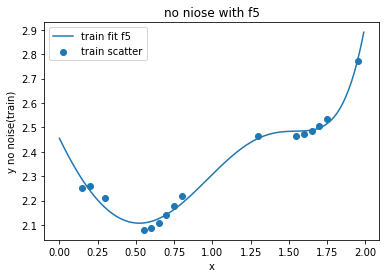

Mean absolute error: 0.0185
Residual sum of squares (MSE): 0.0005
Coefficients of polynoial:  [  0.         -20.60338155  22.85452849  -2.69883673   1.49564892
   0.17341002]
Intercept of polynomial:  0.7865705966654843





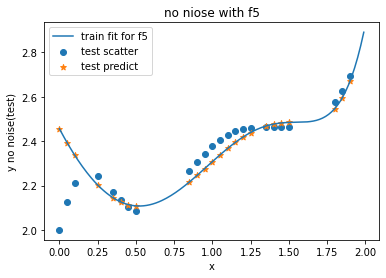

Mean absolute error: 0.0660
Residual sum of squares (MSE): 0.0137


In [83]:
regr_f5_nn=regr.fit(x_f5_train,y_nn_train)
#### train plot & evaluation
y_fit_f5_nn=regr_f5_nn.intercept_[0] + regr_f5_nn.coef_[0][1]*x_train + regr_f5_nn.coef_[0][2]*x_train_sin + regr_f5_nn.coef_[0][3]*x_train_2sin +\
regr_f5_nn.coef_[0][4]*x_train_ex+ regr_f5_nn.coef_[0][5]*x_train_2ex

y_fit_f5_nn_line=regr_f5_nn.intercept_[0] + regr_f5_nn.coef_[0][1]*x + regr_f5_nn.coef_[0][2]*np.sin(x) + regr_f5_nn.coef_[0][3]*np.sin(2*x) +\
regr_f5_nn.coef_[0][4]*np.exp(x) + regr_f5_nn.coef_[0][5]*np.exp(2*x)

plt.scatter(x_train,y_nn_train,label='train scatter')
plt.plot(x,y_fit_f5_nn_line,label='train fit f5',)
plt.legend()

plt.title('no niose with f5')
plt.ylabel('y no noise(train)')
plt.xlabel('x')
plt.savefig('26.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f5_nn-y_nn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f5_nn - y_nn_train) ** 2))
print('Coefficients of polynoial: ', regr_f5_nn.coef_[0])
print('Intercept of polynomial: ',regr_f5_nn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y5_hat_nn = regr.predict(x_f5_test)
plt.plot(x,y_fit_f5_nn_line,label='train fit for f5')
plt.scatter(x_test,y_nn_test,label='test scatter')
plt.scatter(x_test,y5_hat_nn,label='test predict',marker='*')
plt.title('no niose with f5')
plt.ylabel('y no noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('27.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y5_hat_nn-y_nn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y5_hat_nn - y_nn_test) ** 2))


small noise

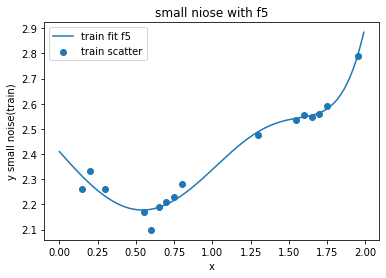

Mean absolute error: 0.0212
Residual sum of squares (MSE): 0.0010
Coefficients of polynoial:  [  0.         -10.2962086   14.49285996  -2.3191455   -0.62291037
   0.18918897]
Intercept of polynomial:  2.8434994615804494





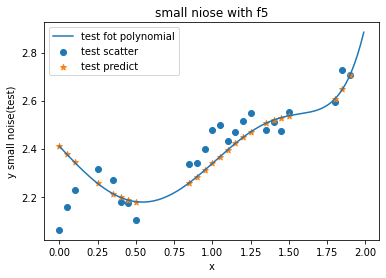

Mean absolute error: 0.0759
Residual sum of squares (MSE): 0.0113


In [84]:
regr_f5_sn=regr.fit(x_f5_train,y_sn_train)
#### train plot & evaluation
y_fit_f5_sn=regr_f5_sn.intercept_[0] + regr_f5_sn.coef_[0][1]*x_train + regr_f5_sn.coef_[0][2]*x_train_sin + regr_f5_sn.coef_[0][3]*x_train_2sin +\
regr_f5_sn.coef_[0][4]*x_train_ex + regr_f5_sn.coef_[0][5]*x_train_2ex

y_fit_f5_sn_line=regr_f5_sn.intercept_[0] + regr_f5_sn.coef_[0][1]*x + regr_f5_sn.coef_[0][2]*np.sin(x) + regr_f5_sn.coef_[0][3]*np.sin(2*x) +\
regr_f5_sn.coef_[0][4]*np.exp(x) + regr_f5_sn.coef_[0][5]*np.exp(2*x)
plt.scatter(x_train,y_sn_train,label='train scatter')
plt.plot(x,y_fit_f5_sn_line,label='train fit f5')
plt.legend()

plt.title('small niose with f5')
plt.ylabel('y small noise(train)')
plt.xlabel('x')
plt.savefig('28.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f5_sn-y_sn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f5_sn - y_sn_train) ** 2))
print('Coefficients of polynoial: ', regr_f5_sn.coef_[0])
print('Intercept of polynomial: ',regr_f5_sn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y5_hat_sn = regr.predict(x_f5_test)
plt.plot(x,y_fit_f5_sn_line,label='test fot polynomial')
plt.scatter(x_test,y_sn_test,label='test scatter')
plt.scatter(x_test,y5_hat_sn,label='test predict',marker='*')
plt.title('small niose with f5')
plt.ylabel('y small noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('29.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y5_hat_sn-y_sn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y5_hat_sn - y_sn_test) ** 2))

big noise

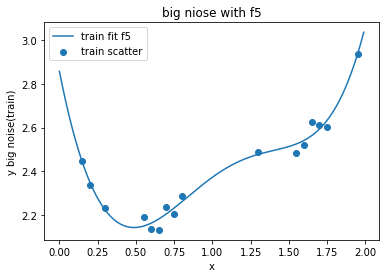

Mean absolute error: 0.0261
Residual sum of squares (MSE): 0.0009
Coefficients of polynoial:  [  0.         -52.17478354  39.52016563  -1.32745983  12.10494074
  -0.18141305]
Intercept of polynomial:  -9.065633628157105





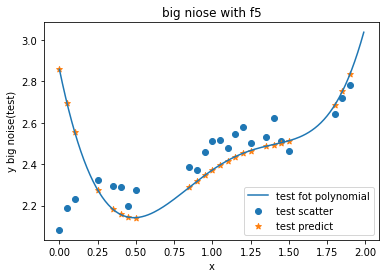

Mean absolute error: 0.1375
Residual sum of squares (MSE): 0.0473


In [85]:
regr_f5_bn=regr.fit(x_f5_train,y_bn_train)
#### train plot & evaluation
y_fit_f5_bn=regr_f5_bn.intercept_[0] + regr_f5_bn.coef_[0][1]*x_train + regr_f5_bn.coef_[0][2]*x_train_sin + regr_f5_bn.coef_[0][3]*x_train_2sin +\
regr_f5_bn.coef_[0][4]*x_train_ex + regr_f5_bn.coef_[0][5]*x_train_2ex

y_fit_f5_bn_line=regr_f5_bn.intercept_[0] + regr_f5_bn.coef_[0][1]*x + regr_f5_bn.coef_[0][2]*np.sin(x) + regr_f5_bn.coef_[0][3]*np.sin(2*x) +\
regr_f5_bn.coef_[0][4]*np.exp(x) + regr_f5_bn.coef_[0][5]*np.exp(2*x)
plt.scatter(x_train,y_bn_train,label='train scatter')
plt.plot(x,y_fit_f5_bn_line,label='train fit f5')
plt.legend()

plt.title('big niose with f5')
plt.ylabel('y big noise(train)')
plt.xlabel('x')
plt.savefig('30.jpg')
plt.show()

print("Mean absolute error: %.4f" %np.mean(np.absolute(y_fit_f5_bn-y_bn_train)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y_fit_f5_bn - y_bn_train) ** 2))
print('Coefficients of polynoial: ', regr_f5_bn.coef_[0])
print('Intercept of polynomial: ',regr_f5_bn.intercept_[0])

print(2*'\n')
#### test plot & evaluation
y5_hat_bn = regr_f5_bn.predict(x_f5_test)
plt.plot(x,y_fit_f5_bn_line,label='test fot polynomial')
plt.scatter(x_test,y_bn_test,label='test scatter')
plt.scatter(x_test,y5_hat_bn,label='test predict',marker='*')
plt.title('big niose with f5')
plt.ylabel('y big noise(test)')
plt.xlabel('x')
plt.legend()
plt.savefig('31.jpg')
plt.show()
print("Mean absolute error: %.4f" %np.mean(np.absolute(y5_hat_bn-y_bn_test)))
print("Residual sum of squares (MSE): %.4f" % np.mean((y5_hat_bn - y_bn_test) ** 2))